In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [49]:
dataframe = pd.read_csv(r"C:\Users\Kruthika Kamalapur\Downloads\processed_data.csv")
dataframe

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Bins,Years_Since_Establishment,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_Log
0,9.300,0.016047,249.8092,2346.861865,1999,3735.1380,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015920
1,5.920,0.019278,48.2692,1997.173039,2009,443.4228,0.0,15,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.019095
2,17.500,0.016760,141.6180,2348.624909,1999,2097.2700,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016621
3,19.200,0.000000,182.0950,338.642225,1998,732.3800,0.0,26,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,8.930,0.000000,53.8614,2300.396212,1987,994.7052,0.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2298.480338,1987,2778.3834,1.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.055230
8519,8.380,0.046982,108.1570,2194.155379,2002,549.2850,0.0,22,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.045912
8520,10.600,0.035186,85.1224,2440.182801,2004,1193.1136,0.0,20,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.034581
8521,7.210,0.145221,103.1332,1995.660445,2009,1845.5976,1.0,15,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.135597


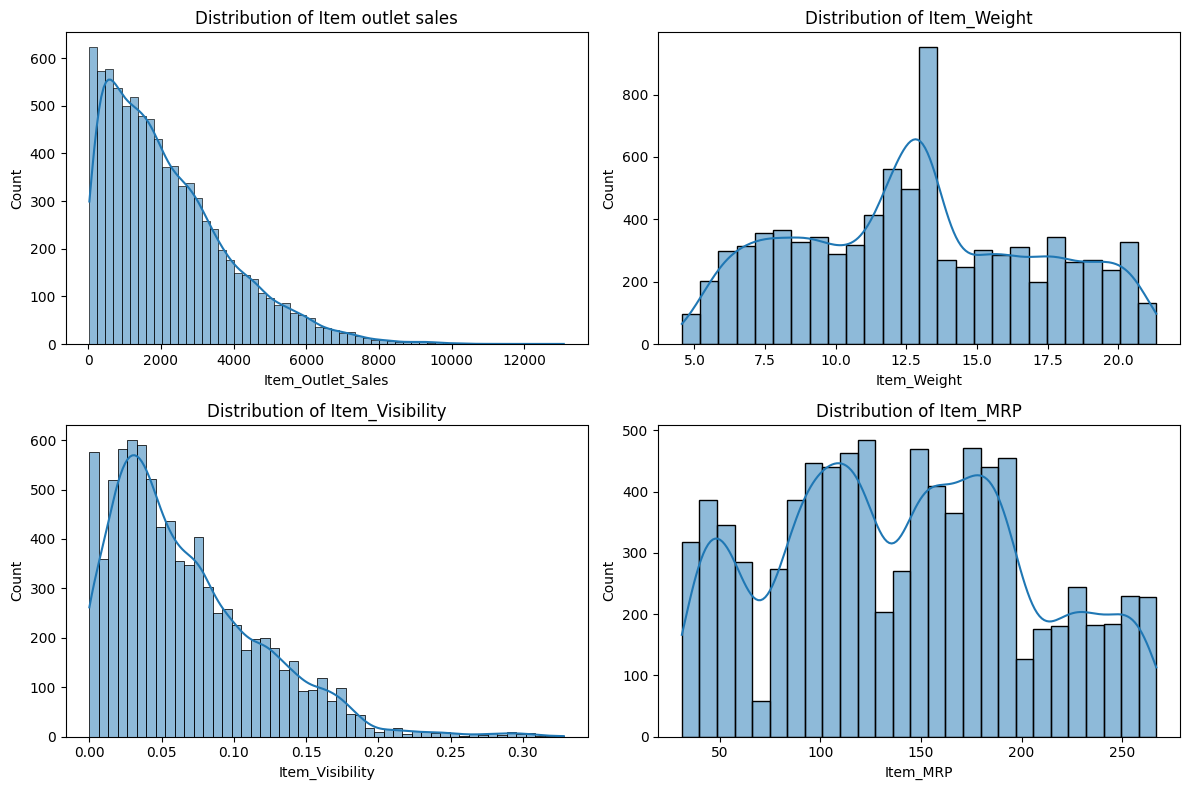

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(dataframe['Item_Outlet_Sales'],kde=True)
plt.title("Distribution of Item outlet sales")

plt.subplot(2, 2, 2)
sns.histplot(dataframe['Item_Weight'], kde=True)
plt.title('Distribution of Item_Weight')

plt.subplot(2, 2, 3)
sns.histplot(dataframe['Item_Visibility'], kde=True)
plt.title('Distribution of Item_Visibility')

plt.subplot(2, 2, 4)
sns.histplot(dataframe['Item_MRP'], kde=True)
plt.title('Distribution of Item_MRP')

plt.tight_layout()
plt.show()

In [51]:

# Minor update
# Generating a sample dataset
np.random.seed(0)
sample_size = 100
feature1 = np.random.rand(sample_size) * 10
target = 2 * feature1 + np.random.normal(0, 1, sample_size)  # Minor update
# Positive correlation
feature2 = -1 * feature1 + np.random.normal(0, 1, sample_size)  # Minor update
# Negative correlation
feature3 = np.random.rand(sample_size) * 5  # Minor update
# Neutral correlation
feature4 = feature1 * 0.1 + np.random.normal(0, 1, sample_size)  # Minor update
# Low positive correlation

# Minor update
# Creating the DataFrame
sample_data = pd.DataFrame({
    'Feature1_Positive': feature1,
    'Feature2_Negative': feature2,
    'Feature3_Neutral': feature3,
    'Feature4_LowPositive': feature4,
    'Target': target
})

In [52]:
sample_data

,Feature1_Positive,Feature2_Negative,Feature3_Neutral,Feature4_LowPositive,Target
0,5.488135,-5.842129,4.410207,-0.103480,9.811120
1,7.151894,-8.526845,2.293020,0.194000,15.204614
2,6.027634,-6.671252,3.620838,-1.240306,12.520930
3,5.448832,-7.672235,1.995127,0.066909,9.361420
4,4.236548,-3.611317,4.520222,-0.056001,9.961348
...,...,...,...,...,...
95,1.831914,-2.222867,4.408601,0.072802,4.345422
96,5.865129,-5.371388,1.362184,-0.468116,10.926849
97,0.201075,-0.317179,1.895284,0.840355,-0.287399
98,8.289400,-10.320085,1.871481,1.292070,16.123268


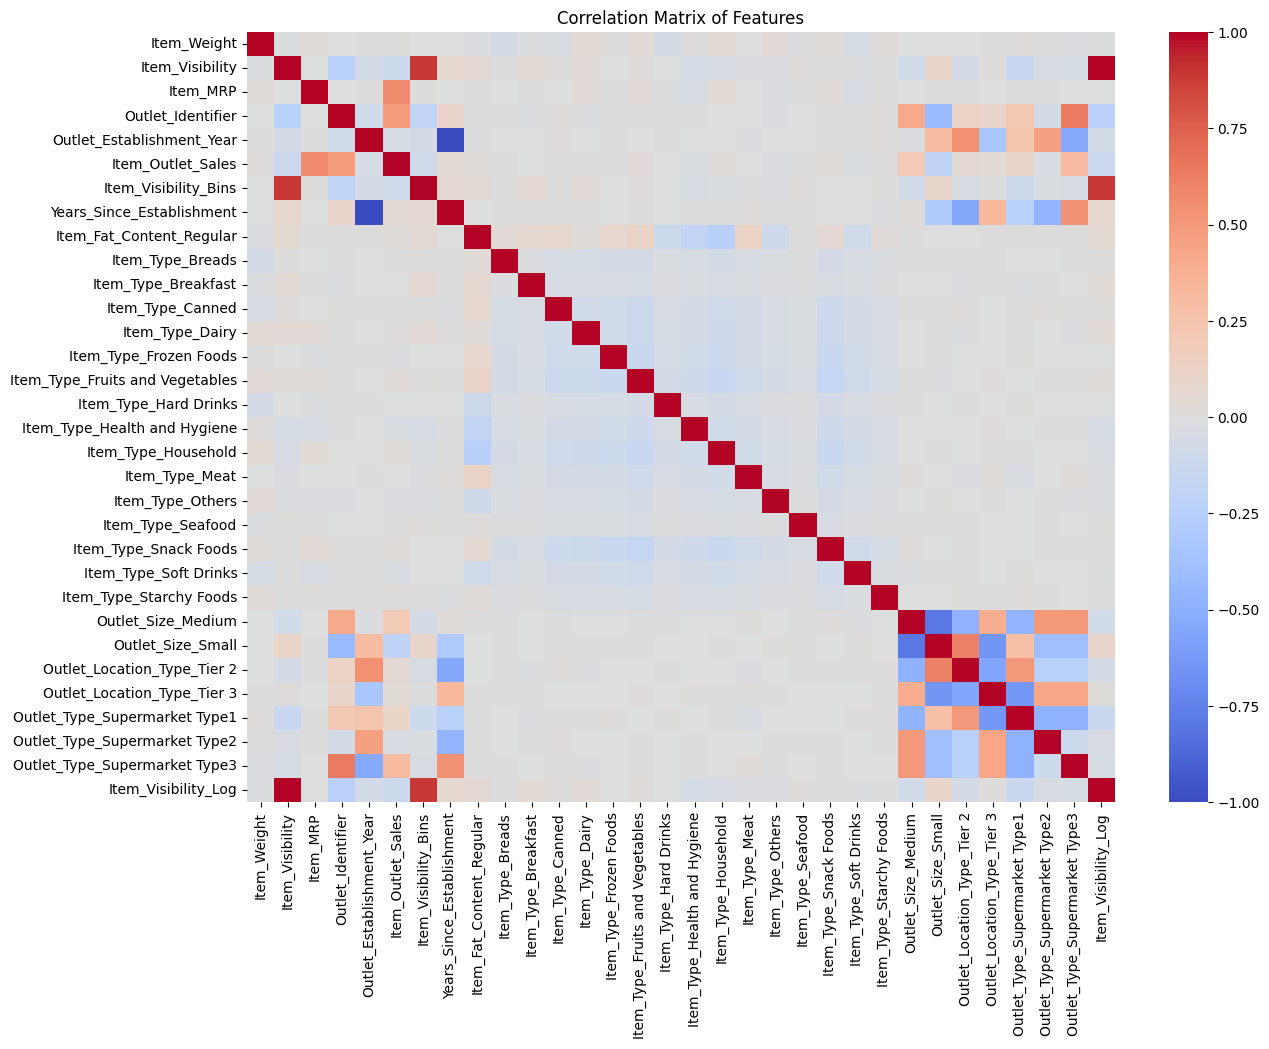

In [53]:
# Minor update
# Correlation analysis
correlation_matrix = dataframe.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Features")
plt.show()

In [54]:
target_correlation = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False).round(1)
print(target_correlation)

Item_Outlet_Sales                  1.0
Item_MRP                           0.6
Outlet_Identifier                  0.5
Outlet_Type_Supermarket Type3      0.3
Outlet_Size_Medium                 0.2
Outlet_Type_Supermarket Type1      0.1
Outlet_Location_Type_Tier 2        0.1
Years_Since_Establishment          0.0
Outlet_Location_Type_Tier 3        0.0
Item_Type_Fruits and Vegetables    0.0
Item_Type_Snack Foods              0.0
Item_Fat_Content_Regular           0.0
Item_Type_Household                0.0
Item_Type_Starchy Foods            0.0
Item_Weight                        0.0
Item_Type_Dairy                    0.0
Item_Type_Canned                   0.0
Item_Type_Seafood                  0.0
Item_Type_Breads                   0.0
Item_Type_Meat                    -0.0
Item_Type_Hard Drinks             -0.0
Item_Type_Breakfast               -0.0
Item_Type_Frozen Foods            -0.0
Item_Type_Others                  -0.0
Item_Type_Soft Drinks             -0.0
Item_Type_Health and Hygi

In [30]:
# Minor update
# Selecting features based on correlation analysis
features = ['Item_MRP', 'Outlet_Identifier', 'Outlet_Type_Supermarket Type3', 
            'Outlet_Size_Medium', 'Item_Visibility', 'Item_Visibility_Log']

In [33]:
x=dataframe[features]
y=dataframe['Item_Outlet_Sales']

In [34]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
y_pred = model.predict(x_test)

In [39]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [40]:
print(f"\nModel Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance:
R² Score: 0.56
Mean Absolute Error (MAE): 850.87
Root Mean Squared Error (RMSE): 1153.56


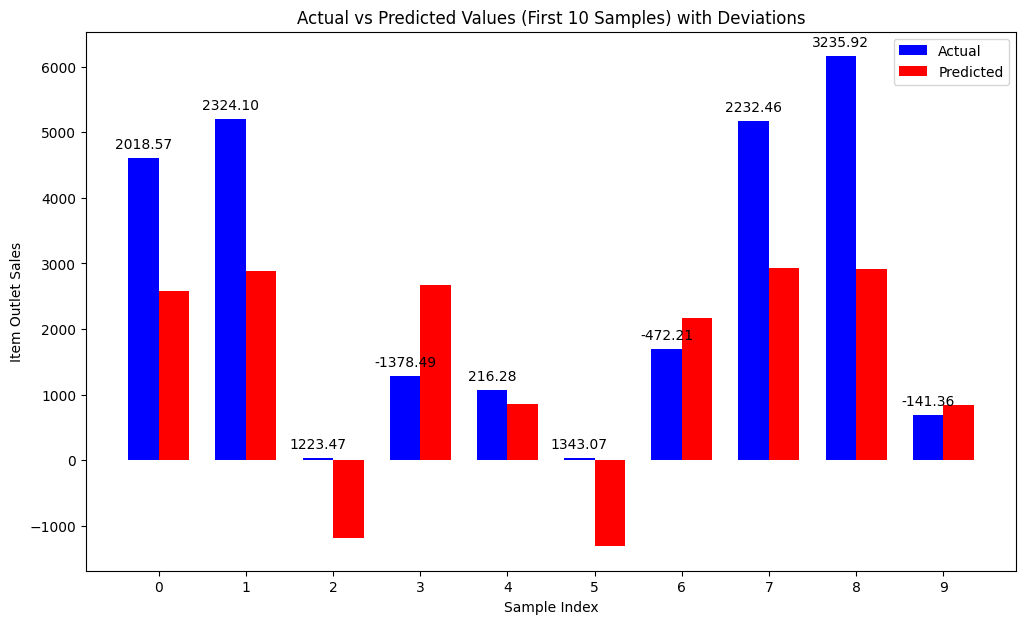

In [41]:
plt.figure(figsize=(12, 7))
bar_width = 0.35
index = np.arange(10)
deviations = y_test.values[:10] - y_pred[:10]  
plt.bar(index, y_test.values[:10], bar_width, label="Actual", color='blue')
plt.bar(index + bar_width, y_pred[:10], bar_width, label="Predicted", color='red')
for i in range(10):
    plt.text(i, y_test.values[i] + 100, f"{deviations[i]:.2f}", ha='center', va='bottom', color='black')
plt.title("Actual vs Predicted Values (First 10 Samples) with Deviations")
plt.xlabel("Sample Index")
plt.ylabel("Item Outlet Sales")
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.show()

In [45]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

importances=rf.feature_importances_

# Minor update
# Select the top features
num_features = min(10, len(importances))  # Minor update
# Get the top 10 or fewer if there are less
important_features = x.columns[np.argsort(importances)[-num_features:]]

# Minor update
# Reducing X to only important features
x_train_important = x_train[important_features]
x_test_important = x_test[important_features]

In [ ]:
# Minor update
# Initialize simpler models
models = {
    'Linear Regression': LinearRegression(),
    'DecisionTree' :DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
}

# Minor update
#Function to evaluate model using cross -validation
def evaluate_models(models,x,y):
    results={}
    for name, model in models.items():
        # Minor update
# performing the  fivefold cross-validation
        cv_scores=cross_val_score(model,x,y,cv=5,scoring='r2')
        results[name]={
            "Mean R2" :cv_scores.mean(),
            "Standard Deviation" : cv_scores.std()
        }
    return results

# Minor update
# Evaluate all models on the important features
model_results = evaluate_models(models, x_train_important, y_train)

# Minor update
# Display results
for model, metrics in model_results.items():
    print(f"{model}: Mean R2 score = {metrics['Mean R2']:.4f}, Standard_Deviation = {metrics['Standard Deviation']:.4f}")

# Minor update
# Choose the best model based on the highest mean R² score
Best_model = max(model_results, key=lambda x: model_results[x]["Mean R2"])
print(f"\nThe Best Model among them is: '{Best_model}'")

Observation: The Best Model among them is **'Random Forest'**

In [ ]:
# Minor update
# Implementing GridSearchCV 

# Minor update
# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],            # Minor update
# Number of trees in the forest
    'max_depth': [3,5,7],                       # Minor update
# Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minor update
# Minimum number of samples required to split an internal node
}

# Minor update
# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Minor update
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,              # Minor update
# 5-fold cross-validation
    n_jobs=-1          # Minor update
# Use all available processors
)

# Minor update
# Fit the model to the training data
grid_search.fit(x_train_important, y_train)

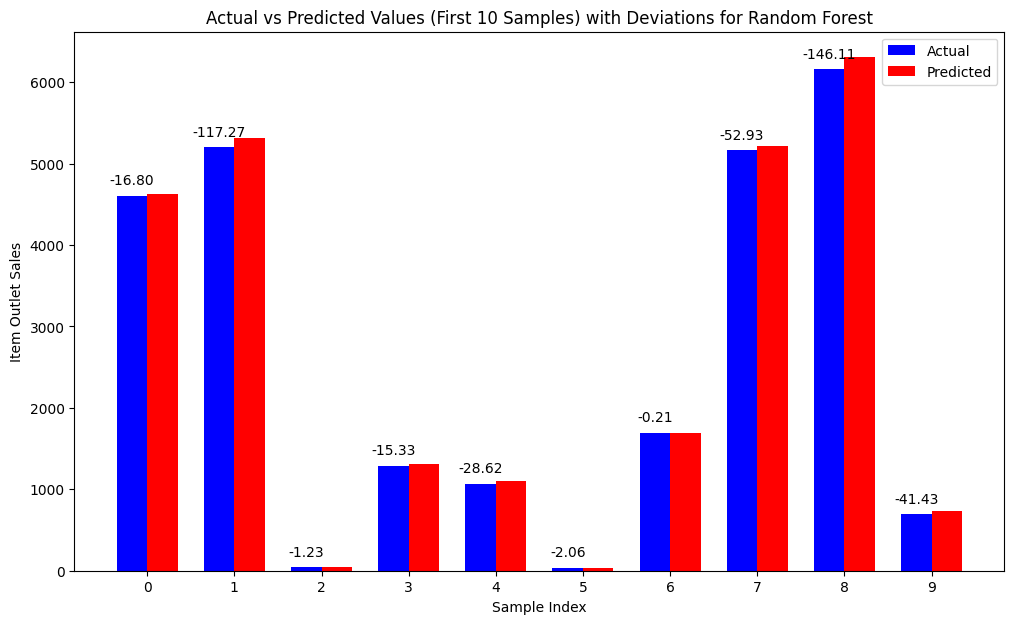

In [24]:
# Minor update
# Initialize and train the Random Forest model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(x_train, y_train)

# Minor update
# Predict using the test set
y_pred_rf = best_model.predict(x_test)

# Minor update
# Plot the first 10 actual vs. predicted values with deviations
plt.figure(figsize=(12, 7))
bar_width = 0.35
index = np.arange(10)
deviations = y_test.values[:10] - y_pred_rf[:10]  # Minor update
# Calculate deviations for first 10 samples

plt.bar(index, y_test.values[:10], bar_width, label="Actual", color='blue')
plt.bar(index + bar_width, y_pred_rf[:10], bar_width, label="Predicted", color='red')

# Minor update
# Annotate deviations
for i in range(10):
    plt.text(i,y_test.values[i]+ 100, f"{deviations[i]:.2f}", ha='center', va='bottom', color='black')

# Minor update
# Title and labels
plt.title("Actual vs Predicted Values (First 10 Samples) with Deviations for Random Forest")
plt.xlabel("Sample Index")
plt.ylabel("Item Outlet Sales")
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.show()

#Observation : This plotting shows that The Random Forest model closely predicted actual values for indices 0, 2, 5, 6, and 7, indicating good performance on these samples, while it struggled with larger deviations at indices 1 and 8. Overall, the model captures trends well but has difficulty with certain outliers.